In [1]:
# Reading the dataset
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/ParisHousing.csv')

In [2]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
# Shape of dataset
data.shape

(10000, 17)

# **Data preprocessing**

In [4]:
# Checking null values in dataset
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [5]:
# Defining input-output features
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
X

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]])

In [6]:
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 0.89156241, -1.64351831, -1.01755405, ...,  1.53748782,
        -1.00601811,  0.63137326],
       [ 1.07395603, -0.39418009,  0.98274878, ..., -1.62237047,
         0.99401789, -0.9428096 ],
       [ 0.20303346,  0.26519286, -1.01755405, ..., -1.59565669,
         0.99401789,  1.26104641],
       ...,
       [ 1.18065352, -1.64351831, -1.01755405, ..., -0.79424336,
         0.99401789,  1.26104641],
       [ 0.31855868,  0.68163893, -1.01755405, ..., -0.81714088,
         0.99401789, -0.31313646],
       [-1.68318347,  1.16749268, -1.01755405, ..., -1.04993237,
         0.99401789,  0.31653669]])

In [8]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
# Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 16)
(9000,)
(1000, 16)
(1000,)


# **Defining neural net with regularizers**

In [9]:
# Libraries for neural networks
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers

The neural network will be the same as the previous regression model is a 4 neural network, the only difference is that we are initializing the regularization to the 2 hidden layers

The Keras provides the three kinds of the regularization I,e activity regularizer, kernel regularizer, and bias regularizer. Here we are initializing the kernel regularizer. The kernel regularizer is used to decay the weight growths.

In [10]:
# Defining the neural network model
model = Sequential()
model.add(Dense(24, input_dim=16, activation='relu'))
model.add(Dense(28, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(12, activation='linear', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(1, activation='linear'))

Now let’s define the optimizer function. 

In [11]:
# Defining optimizer
import tensorflow as tf
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)

In [12]:
# Compiling the classifier
model.compile(loss='mse', optimizer= opt, metrics=['mae'])

In [13]:
# Summary of the neural network model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 28)                700       
                                                                 
 dense_2 (Dense)             (None, 12)                348       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,469
Trainable params: 1,469
Non-trainable params: 0
_________________________________________________________________


From the above summary, it is clear that the model has 4 layers 1 input and output layers and 2 hidden layers.

# **Training the neural net**

In [14]:
# Training the classifier
history = model.fit(X_train, y_train, epochs=50, batch_size=8)

Epoch 1/50
1125/1125 [==============================] - 3s 2ms/step - loss: 32315963080704.0000 - mae: 4917755.5000
Epoch 2/50
1125/1125 [==============================] - 2s 2ms/step - loss: 19086333444096.0000 - mae: 3728188.2500
Epoch 3/50
1125/1125 [==============================] - 3s 3ms/step - loss: 1819779792896.0000 - mae: 1046393.3125
Epoch 4/50
1125/1125 [==============================] - 4s 3ms/step - loss: 138677944320.0000 - mae: 314015.5312
Epoch 5/50
1125/1125 [==============================] - 3s 3ms/step - loss: 98031624192.0000 - mae: 249844.1719
Epoch 6/50
1125/1125 [==============================] - 3s 3ms/step - loss: 85308514304.0000 - mae: 224253.6406
Epoch 7/50
1125/1125 [==============================] - 3s 3ms/step - loss: 72997183488.0000 - mae: 204283.5312
Epoch 8/50
1125/1125 [==============================] - 3s 2ms/step - loss: 59584061440.0000 - mae: 181720.4844
Epoch 9/50
1125/1125 [==============================] - 2s 2ms/step - loss: 46468743168.0000

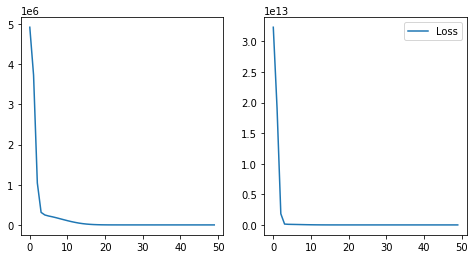

In [15]:
# Plotting the performance
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
ax1.plot(history.history['mae'], label = 'MAE')
ax2.plot(history.history['loss'], label = 'Loss')
plt.legend()
plt.show()

# **Making predictions**

In [16]:
# Making prediction on test data
predictions = model.predict(X_test)


In [17]:
# Comparing predicted and actual prices
import pandas as pd
import numpy as np
pd.DataFrame(data={'Predicted Price': predictions[:,0], 'Actual Price': y_test})

,Predicted Price,Actual Price
0,1.405175e+06,1402812.2
1,5.061933e+05,506461.3
2,6.271976e+06,6272659.4
3,8.764431e+06,8769157.6
4,1.920964e+05,190783.0
...,...,...
995,3.652366e+06,3653259.0
996,4.088255e+06,4091282.1
997,6.959412e+06,6965618.1
998,9.872794e+06,9873946.9


In [18]:
# MSE and RMSE
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(predictions[:,0], y_test)
rmse = math.sqrt(mse)
print('MSE = %2f; RMSE = %2f'% (mse, rmse))

MSE = 8700167.457783; RMSE = 2949.604627
